<h1>Reconocimiento de imagen pa loh profes</h1>

<h2>Packages & libs</h2>

In [41]:
import sys
!{sys.executable} -m pip install opencv-python

In [42]:
import cv2 as cv

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
from skimage.filters import threshold_otsu, threshold_local, try_all_threshold
from matplotlib.backends.backend_pdf import PdfPages

<h2>Image for testing shadow behaviour</h2>

<p>The idea is to choose from here the best approach for our use case, for that we are testing different libs with Karen</p>

In [90]:
#This is the test for the image, provided by skimage
img = data.page()
#img = io.imread('imgtest1.jpeg')

<h3>Testing scikit-image<h3>

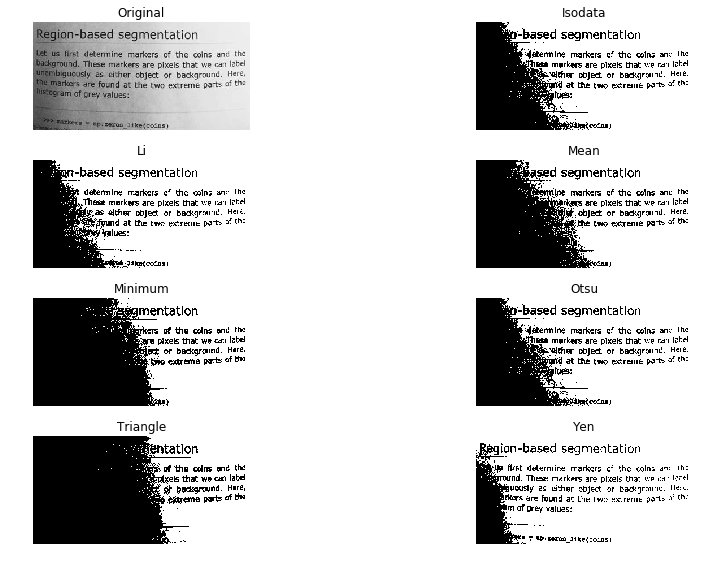

In [83]:
fig, ax = try_all_threshold(img, figsize=(15, 8), verbose=False)

<h3>Testing with open CV<h3>

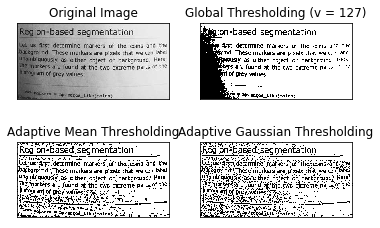

In [98]:
#img = cv.imread('imgtest1.jpeg', 0)
#img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

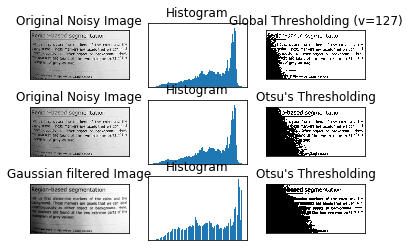

In [91]:
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()